<a href="https://colab.research.google.com/github/JasmineD0401/SMA-LABS/blob/main/Location_Analysis_(lab_05).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[location dataset](https://drive.google.com/file/d/1942fEC_qDFy8dm0fELVOYpqBJ2YVd_nl/view?usp=sharing)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/La_Veranda_Reviews-2023-01-16.csv')

In [ ]:
df


,Title,PositiveReview,NegativeReview,Score,GuestName,GuestCountry,RoomType,NumberOfNights,VisitDate,GroupType,PropertyResponse
0,Wonderful place to stay.,"New, comfortable apartments, close to the airp...",Nothing at all.,10.0,Olga,Norway,Budget Twin Room,1 night,June 2022,Solo traveler,NaN
1,It was superb,We had a really pleasant stay! The staff was v...,NaN,10.0,Iwona,Poland,Double Room,3 nights,December 2022,Family,NaN
2,Very Good,the location is great and near the airport. bu...,NaN,8.0,Ruijia,Sweden,Double Room,1 night,December 2022,Solo traveler,NaN
3,Wonderful,Great stuff\nGreat Quality/price\nClean,NaN,9.0,Theprincem,United Kingdom,Double Room with Balcony,2 nights,September 2022,Solo traveler,NaN
4,"Fantastic value for a new, modern and spotless...","Clean and modern with very comfortable beds, i...",NaN,10.0,M,Switzerland,Family Suite with Balcony,1 night,October 2022,Family,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1518,Exceptional,NaN,NaN,10.0,Anonymous,Israel,NaN,5 nights,September 2021,Couple,NaN
1519,Wonderful,NaN,NaN,9.0,Anonymous,Czech Republic,NaN,1 night,September 2021,Group,NaN
1520,Very Good,NaN,NaN,8.0,Anonymous,Sweden,NaN,1 night,August 2021,Couple,NaN
1521,Wonderful,NaN,NaN,9.0,Anonymous,Germany,NaN,3 nights,September 2021,Solo traveler,NaN


In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.columns

Index(['Title', 'PositiveReview', 'NegativeReview', 'Score', 'GuestName',
       'GuestCountry', 'RoomType', 'NumberOfNights', 'VisitDate', 'GroupType',
       'PropertyResponse'],
      dtype='object')

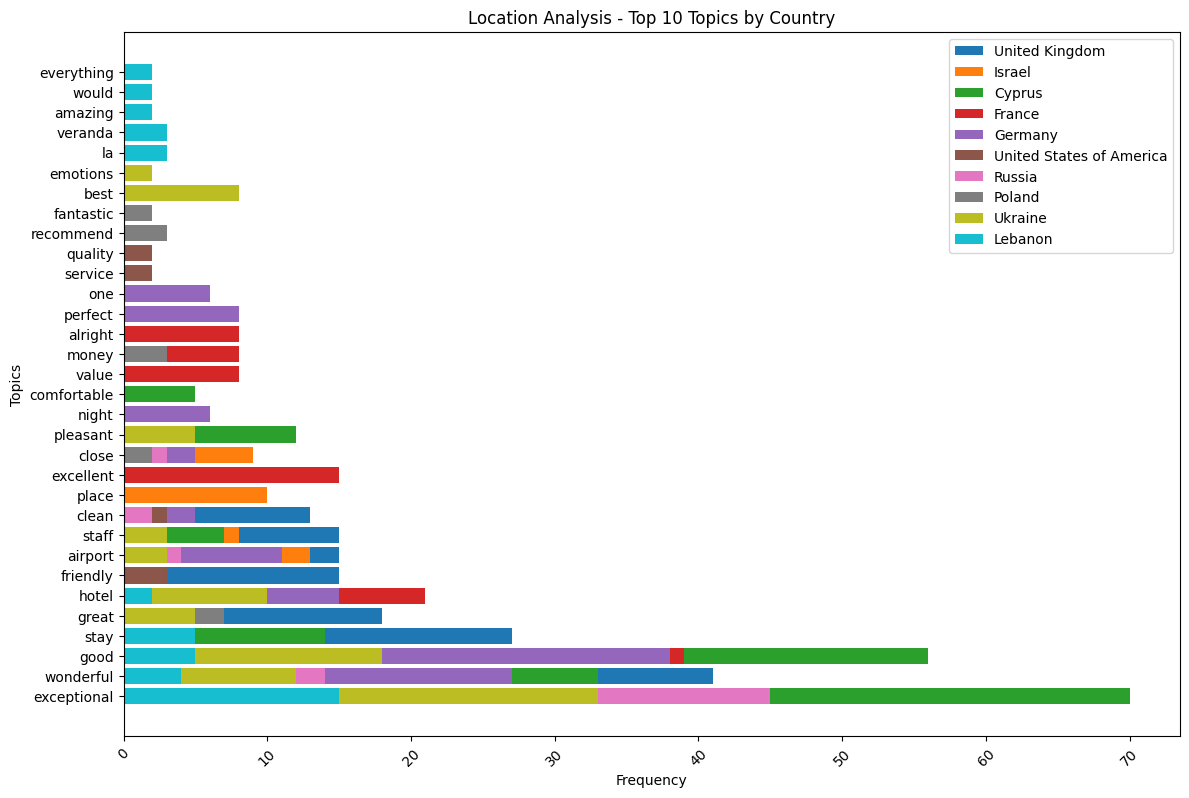

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Load the data
df = pd.read_csv('/content/La_Veranda_Reviews-2023-01-16.csv')  # Replace 'your_dataset.csv' with your actual dataset file

# Extract relevant columns
location_data = df['GuestCountry']
topics_data = df['Title']

# Tokenize and preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize text
    words = word_tokenize(text.lower())
    # Remove stopwords and non-alphanumeric characters
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

# Count topics in each location
topic_counts_by_location = {}
for location, topic in zip(location_data, topics_data):
    if isinstance(location, str) and isinstance(topic, str):
        topics = preprocess_text(topic)
        if location in topic_counts_by_location:
            topic_counts_by_location[location].update(topics)
        else:
            topic_counts_by_location[location] = Counter(topics)
top_countries = sorted(topic_counts_by_location.keys(), key=lambda x: len(topic_counts_by_location[x]), reverse=True)[:10]

# Plot the results
plt.figure(figsize=(12, 8))
for location in top_countries:
    topic_counts = topic_counts_by_location[location]
    topics, counts = zip(*sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)[:10])  # Top 10 topics
    plt.barh(topics, counts, label=location)


plt.xlabel('Frequency')
plt.ylabel('Topics')
plt.title('Location Analysis - Top 10 Topics by Country')
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()
